<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense

# import from tensorflow
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [7]:
Diabetes = load_diabetes()

In [9]:
print(Diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [39]:
# Independent variables
X = Diabetes.data
print(f'Independent variables\nObservations: {X.shape[0]}\nFeatures: {X.shape[1]}\n')

#save nr of columns
n_col = X.shape[1]

#target variable
y = Diabetes.target
print(f'Target observations: {y.shape[0]}')


Independent variables
Observations: 442
Features: 10

Target observations: 442


### Split the data (training/test)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [80]:
X_train.shape, X_test.shape

((353, 10), (89, 10))

In [81]:
y_train.shape, y_test.shape

((353,), (89,))

### Create the model's architecture

In [120]:
# Create the model
model = Sequential()

In [121]:
# Add the first hidden layer
model.add(Dense(64, activation = 'relu', input_shape = (n_cols, )))

# Add the second hidden layer
model.add(Dense(32, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'relu'))

In [122]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                704       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [123]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

### Fit the training data

In [124]:
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state = 11)

In [125]:
%%time
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.1,
    batch_size = 10,
    epochs = 50,
    verbose = 1
)

Epoch 1/50
32/32 [==============================] - 0s 5ms/step - loss: 29353.6426 - mae: 153.2988 - val_loss: 23638.9297 - val_mae: 135.8008
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 29205.5293 - mae: 152.8145 - val_loss: 23411.7734 - val_mae: 134.9693
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 28772.8770 - mae: 151.4188 - val_loss: 22815.3203 - val_mae: 132.7980
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 27767.3379 - mae: 148.2217 - val_loss: 21612.1621 - val_mae: 128.3323
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 25975.0742 - mae: 142.2002 - val_loss: 19593.5898 - val_mae: 120.5182
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 23226.8730 - mae: 132.4456 - val_loss: 16773.3789 - val_mae: 108.6965
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 19604.5234 - mae: 118.3440 - val_loss: 13353.5107 - val_mae: 92.4734
Epoch 8

### Create predictions

In [126]:
predictions = model.predict(X_test)

### Evaluate the model

In [127]:
score = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 2865.0535 - mae: 43.4711


In [128]:
# Find RMSE
score[0] ** (1/2)

53.52619421177705

In [129]:
y.mean()

152.13348416289594

In [130]:
y.std()

77.00574586945044

In [131]:
y.min()

25.0

In [132]:
y.max()

346.0

### Visualisation of cost

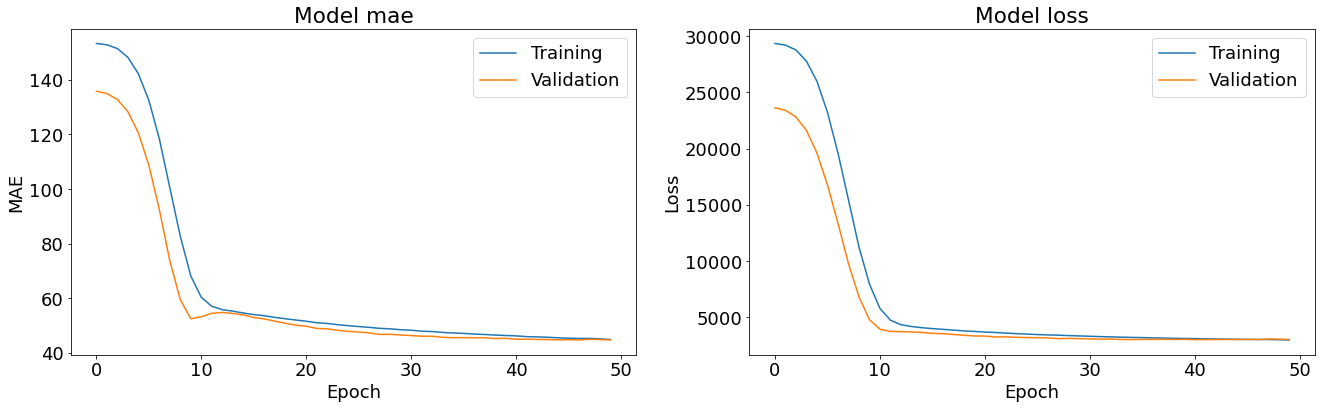

In [134]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mae'], label = 'Training')
ax[0].plot(history.history['val_mae'], label = 'Validation')
ax[0].set_title('Model mae')
ax[0].set_ylabel('MAE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [135]:
# insert code here
from sklearn.metrics import r2_score
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

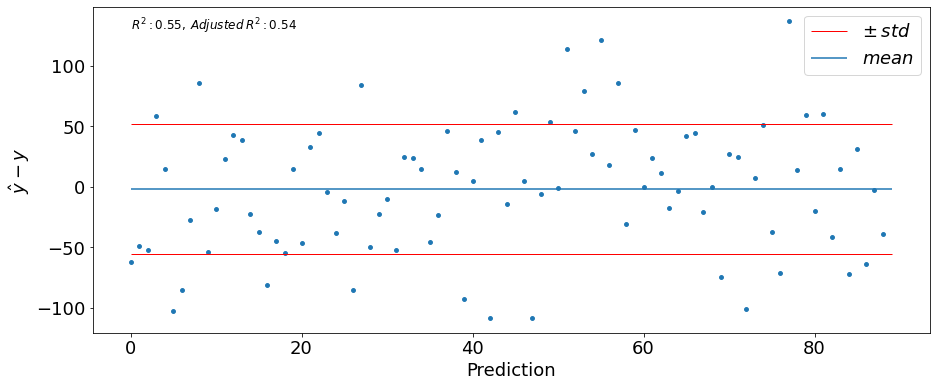

In [136]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



